**Important note**! Before you turn in this lab notebook, make sure everything runs as expected:

- First, restart the kernel -- in the menubar, select Kernel → Restart.
- Then run all cells -- in the menubar, select Cell → Run All.

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE."

# Movie Revenue Analysis

In this problem you are required to get your hands dirty with a (fairly clean) dataset. It contains information for about 5000 Hollywood movies. We will try to find how the movie revenue are related with budgets, ratings and genres.

This dataset is sourced from https://www.kaggle.com/makray/tmdb-5000-movies/data.

The original source for the data is the movie database is https://www.themoviedb.org

Let's start by inspecting the dataset.

In [1]:
from cse6040utils import download_all
datasets = {'tmdb_5000_movies.csv': '64346a71897b5741d553d34b86088603'}
datapaths = download_all(datasets, local_suffix="tmdb/", url_suffix="tmdb/")

'tmdb_5000_movies.csv' is ready!


In [2]:
import pandas as pd
from IPython.display import display
import ast

# Import the dataset
data = pd.read_csv(datapaths["tmdb_5000_movies.csv"])

# Display the data
display(data.head())

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Here are the available variables:

In [3]:
list(data.columns)

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

That's a lot of variables! How many have missing values?

**Exercise 0** (1 point). Write a function,

```python
    def find_missing_vals(df, colname):
        ...
```

which should return the number of missing values given a dataframe `df` and column name `colname`.

For example, observe that the row at offset 15 has a `NaN` in the `homepage` field:

In [4]:
data.iloc[15]

budget                                                          225000000
genres                  [{"id": 12, "name": "Adventure"}, {"id": 10751...
homepage                                                              NaN
id                                                                   2454
keywords                [{"id": 818, "name": "based on novel"}, {"id":...
original_language                                                      en
original_title                   The Chronicles of Narnia: Prince Caspian
overview                One year after their incredible adventures in ...
popularity                                                        53.9786
production_companies    [{"name": "Walt Disney", "id": 5888}, {"name":...
production_countries    [{"iso_3166_1": "CZ", "name": "Czech Republic"...
release_date                                                   2008-05-15
revenue                                                         419651413
runtime                               

Therefore, a call to `find_missing_vals(data, 'homepage')` should include this row in its returned count.

In [5]:
def find_missing_vals(df, colname):
    return df[colname].isnull().sum()

In [6]:
# Test Cell: Exercise 0

col_null = {'budget': 0,
 'genres': 0,
 'homepage': 3091,
 'id': 0,
 'keywords': 0,
 'original_language': 0,
 'original_title': 0,
 'overview': 3,
 'popularity': 0,
 'production_companies': 0,
 'production_countries': 0,
 'release_date': 1,
 'revenue': 0,
 'runtime': 2,
 'spoken_languages': 0,
 'status': 0,
 'tagline': 844,
 'title': 0,
 'vote_average': 0,
 'vote_count': 0}
for col in data.columns:
    assert find_missing_vals(data, col) == col_null[col], "Looks like you don't have the right count for at least one of the columns"
    
print("\n(Passed!)")


(Passed!)


How many missing values do the columns have?

In [7]:
for col in data.columns:
    if find_missing_vals(data, col):
        print("{} has {} missing values out of {}".format(col,find_missing_vals(data,col),len(data)))

homepage has 3091 missing values out of 4803
overview has 3 missing values out of 4803
release_date has 1 missing values out of 4803
runtime has 2 missing values out of 4803
tagline has 844 missing values out of 4803


It looks like there are not any missing values except in these 5 columns. Let's plot a histogram of the budgets, revenues and vote counts.

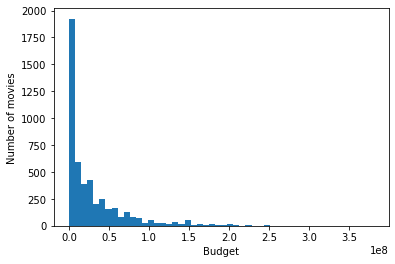

In [8]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.hist(x = data['budget'],bins = 50)
plt.ylabel('Number of movies')
plt.xlabel('Budget');

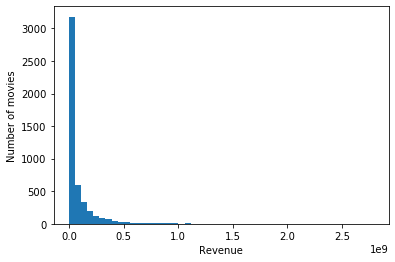

In [9]:
plt.hist(x = data['revenue'],bins = 50)
plt.ylabel('Number of movies')
plt.xlabel('Revenue');

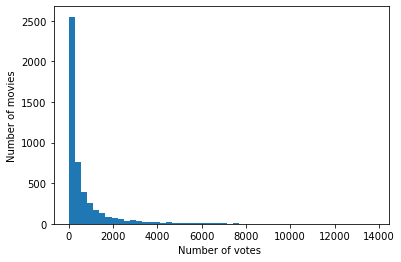

In [10]:
plt.hist(x = data['vote_count'],bins = 50)
plt.ylabel('Number of movies')
plt.xlabel('Number of votes ');

Observe the following:

* There is a huge spike in near zero. The budget and revenue values are likely zero. In the industry from which these data are gathered, budget and revenue values below $100,000 don't make much sense.
* We should also have a minimum vote count to consider the vote average an effective way to measure the quality of a movie. Let's filter the data to get more rows that have "good" budget, revenue and user ratings data.

**Exercise 1** (2 points): Write some code to create a new pandas dataframe **filtered_data** that implements the following

0. Keep only the columns of interest for our analysis i.e. id, budget, revenue, vote_average, vote_count, genres, original_title, popularity
1. keep rows with budget > 100,000
2. keep rows with revenue > 100,000
2. Keep movies with number of votes (vote_count) > 20


In [11]:
filtered_data = data[
    ['id','original_title','genres','budget','revenue','vote_average','vote_count','popularity']
]
filtered_data = filtered_data[
    (filtered_data['budget'] > 100000) & (filtered_data['revenue'] > 100000) & (filtered_data['vote_count'] > 20)
]

# Display the data and count the number of movies remaining
print("Rows remaining: {}".format(len(filtered_data)))
display(filtered_data.head())

Rows remaining: 3065


,id,original_title,genres,budget,revenue,vote_average,vote_count,popularity
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000,2787965087,7.2,11800,150.437577
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000,961000000,6.9,4500,139.082615
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000,880674609,6.3,4466,107.376788
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000,1084939099,7.6,9106,112.312950
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000,284139100,6.1,2124,43.926995


In [12]:
# Test cell: Exercise 1

columns = ['id','original_title','genres','budget','revenue','vote_average','vote_count','popularity']
for col in columns:
    assert col in filtered_data.columns, "You're missing a column"

assert len(filtered_data) == 3065, "Hmm, your filtered data doesn't have the correct number of rows"

assert min(filtered_data.budget) > 100000, "Hmm, you have some budget values less the required"
assert min(filtered_data.revenue) > 100000, "Uh-oh, you have some revenue values less than the required"
assert min(filtered_data.vote_count) > 20, "some vote_counts are less than required"


print("\n(Passed!)")


(Passed!)


Let's look at a paiwise plot for all the numerical variables to see if we see any obvious relationships.

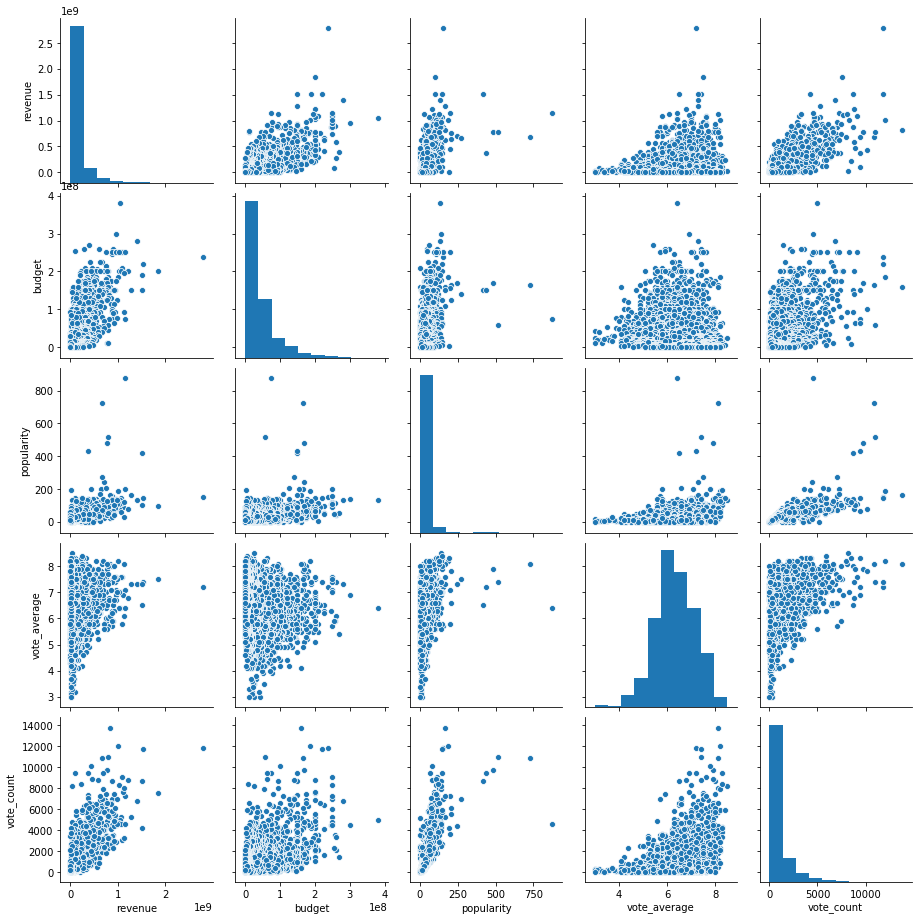

In [13]:
import seaborn as sns
sns.pairplot(filtered_data[['revenue','budget','popularity', 'vote_average','vote_count']])

It appears that revenue is correlated with budget, popularity and vote count. Let's back this visual analysis with correlation coefficients.

**Exercise 2** (1 point). Write a function,

```python
    def corr_coeff(col1, col2):
        ...
```

which takes two **Pandas Series objects** (`col1` and `col2`) as an input and returns their [(Pearson) correlation coefficient](https://en.wikipedia.org/wiki/Correlation_coefficient).

In [14]:
def corr_coeff(col1,col2):
    
    def school_solution():
        return np.corrcoef(col1, col2)[0,1] #numpy method
    
    def my_solution():
        return col1.corr(col2) #pandas method
    
    return my_solution()
    

Let's check what are the correlation coefficients between the different variables we have

In [15]:
# Test Cell: Exercise 2
import numpy.testing as npt

npt.assert_almost_equal(corr_coeff(filtered_data.revenue, filtered_data.vote_count), 0.751209931882, decimal=5)
npt.assert_almost_equal(corr_coeff(filtered_data.revenue, filtered_data.budget), 0.699955328476, decimal=5)
npt.assert_almost_equal(corr_coeff(filtered_data.revenue, filtered_data.popularity), 0.593541205556, decimal=5)
npt.assert_almost_equal(corr_coeff(filtered_data.revenue, filtered_data.vote_average), 0.181083687401, decimal=5)

print("\n(Passed!)")


(Passed!)


In [16]:
for col in ['vote_count','budget','popularity','vote_average']:
    print("correleation coefficient for revenue and {} = {}".format(col,
                                                                    corr_coeff(filtered_data['revenue'],
                                                                               filtered_data[col])))

correleation coefficient for revenue and vote_count = 0.7512099318819581
correleation coefficient for revenue and budget = 0.6999553284759344
correleation coefficient for revenue and popularity = 0.5935412055558158
correleation coefficient for revenue and vote_average = 0.18108368740083916


This confirms our speculation that budget, popularity, vote_average are highly correlated with the revenue.

What about genre -- is it also a driver for movie revenues? And are some genres more popular than others? Let's look at the `genres` column for one specific movie:

In [17]:
filtered_data['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

It looks like a movie has multiple genres: each entry of a genre is stored as a list of dictionaries, with each dictionary having a genre ID and name. In the example above, the corresponding movie has 4 genres, namely, _Action_, _Adventure_, _Fantasy_, and _Science Fiction_. Let's clean this up to find average revenue made by a movie in each genre.

**Instructions for Exercise 3 & 4** (6 points). You need to write some code to create a dataframe named **`avg_revenue_by_genre`** from `filtered_data`. The dataframe should have the following columns:

- `'genre'`: a unique identifier in the dataframe
- `'average_revenue'`: the average revenue for a genre (see below for instructions on how calculate this value)
- `'movie_count'`: the number of movies that list this genre as one of its genres

Here is an example of how to calculate the average revenue by genre.

- If a movie has multiple genres, split the revenue equally to each assigned genre.

For instance, consider the first entry in the row below for _Avatar_, which has 4 genres and a total revenue of $2,787,965,087. Since it is associated with 4 genres, each one will get a 1/4 share of the revenue, $2,787,965,087/4 = $696,991,271.75.

- So, consider this input:

|original_title|genres|revenue|
|--------------|------|-------|
|Avatar|[{"id": 28, "name": "Action"}, {"id": 12, "nam...|2787965087|
|Spectre|[{"id": 28, "name": "Action"}, {"id": 12, "nam...|880674609|

'Avatar'  = {'genre': ['Action', 'Adventure', 'Fantasy', 'Science Fiction'],  'revenue' : 2787965087 } and 
'Spectre' = {'genre': ['Action', 'Adventure', 'Crime'], 'revenue' : 880674609}

Therefore, here is a sample output that you should get.

|genre|average_revenue|movie_count|
|-----|---------------|-----------|
|Action|495274737.375|2|
|Adventure|495274737.375|2|
|Fantasy|696991271.75|1|
|Science Fiction|696991271.75|1|
|Crime|293558203|1|

The average_revenue for Action = ```mean(2787965087/4,880674609/3)```
The average_revenue for Adventure = ```mean(2787965087/4,880674609/3)```
The average_revenue for Fantasy = ```mean(2787965087/4)```
The average_revenue for Science fiction = ```mean(2787965087/4)```
The average_revenue for Crime = ```mean(880674609/3)```

*Hints*:
1. The type of entries in genres in filtered data is currently `'str'`. It will be easier to first convert the entries to a list of dictionaries. (Try searching for [`ast.literal_eval`](https://docs.python.org/3/library/ast.html).)
2. You can use default dictionaries to add the revenue contribution from each movie to each genre.
3. You can use default dictionaries to count the number of movies in each genre.
4. For each genre, using results from 2 and 3, $$average\_revenue = \frac{(total\_revenue)}{(movie\_count)}$$ 

To help you solve this problem, we've broken it up into two parts.

**Exercise 3** (3 points) Let's consider the first part of this problem. Create two dictionaries, **`revenue_by_genre`** and **`movie_count_by_genre`**, that contain a genre's total revenue and genre's movie count, respectively.

- **`revenue_by_genre`**: the key is a genre's name, value is the genre's total revenue.
- **`movie_count_by_genre`**: the key is the genre's name and value is the number of movies associated with the genre.

In [18]:
ast.literal_eval(filtered_data.loc[2,"genres"])

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 80, 'name': 'Crime'}]

In [19]:
from collections import defaultdict # Hint
import ast # Hint

revenue_by_genre = defaultdict(float)
movie_count_by_genre = defaultdict(int)

def revenue_and_movie_count_by_genre(df):
    
    def my_solution():
        for index, row in df.iterrows():
            for d in ast.literal_eval(row['genres']):
                revenue_by_genre[(d['name'])] += row['revenue'] / len(ast.literal_eval(row['genres']))
                movie_count_by_genre[(d['name'])] += 1

    def school_solution():
        def update_by_genre(movie):
            genre_list = [elem['name'] for elem in ast.literal_eval(movie['genres'])]
            num_genres = len(genre_list)
            for genre in genre_list:
                revenue_by_genre[genre] += movie['revenue']/num_genres
                movie_count_by_genre[genre] += 1
        df.apply(lambda x: update_by_genre(x), axis=1)
    
    my_solution()

revenue_and_movie_count_by_genre(filtered_data)

print(revenue_by_genre)
print()
print(movie_count_by_genre)

defaultdict(<class 'float'>, {'Action': 52899681309.18096, 'Adventure': 49734211577.380974, 'Fantasy': 24299962138.55715, 'Science Fiction': 25406225182.907135, 'Crime': 14851826641.249994, 'Drama': 48255230180.207184, 'Thriller': 33212253669.46665, 'Animation': 16092739624.823812, 'Family': 25134994309.780945, 'Western': 1448994117.2833333, 'Comedy': 50741733944.980934, 'Romance': 19590306591.72379, 'Horror': 9587314760.133335, 'Mystery': 8111172219.566666, 'History': 3828170060.899999, 'War': 3976081139.583332, 'Music': 2709964832.9404774, 'Documentary': 525228207.3333333})

defaultdict(<class 'int'>, {'Action': 893, 'Adventure': 648, 'Fantasy': 333, 'Science Fiction': 419, 'Crime': 507, 'Drama': 1351, 'Thriller': 906, 'Animation': 181, 'Family': 354, 'Western': 54, 'Comedy': 1054, 'Romance': 541, 'Horror': 314, 'Mystery': 254, 'History': 138, 'War': 113, 'Music': 101, 'Documentary': 27})


In [20]:
## Test cell: Exercise 3
assert isinstance(revenue_by_genre, dict), "type of revenue_by_genre is not dict"
assert isinstance(movie_count_by_genre, dict), "type of movie_count_by_genre is not dict"

all_revs__ = sum(revenue_by_genre.values())
all_revs_true__ = 390406088153.0
rel_delta_all_revs__ = (all_revs__ - all_revs_true__) / all_revs_true__
assert abs(rel_delta_all_revs__) <= 1e-7, \
       "Your total sum of revenue: {} does not match the instructor's: {}".format(all_revs__, all_revs_true__)

all_movies__ = sum(movie_count_by_genre.values())
assert all_movies__ == 8188, "Your total sum of movie count, {}, does not match the instructor's sum, {}.".format(all_movies__, 8188)

assert len(revenue_by_genre) & len(movie_count_by_genre) == 18
genres = ['Mystery', 'Romance', 'History', 'Family', 'Science Fiction', 
          'Horror', 'Crime', 'Drama', 'Fantasy', 'Animation', 'Music', 'Adventure',
          'Action', 'Comedy', 'Documentary', 'War', 'Thriller', 'Western']

for gen in genres:
    assert gen in revenue_by_genre.keys(), "{} is not in your revenue_by_genre dictionary".format(gen)
    assert gen in movie_count_by_genre.keys(), "{} is not in your movie_count_by_genre dictionary".format(gen)
    
sample_genres = {'Documentary': [525228204.0, 27],
                 'Animation': [16092739561.0, 181],
                 'Western': [1448994102.0, 54],
                 'Mystery': [8111172141.0, 254]}

for gen in sample_genres:
    rev__ = revenue_by_genre[gen]
    rev_true__ = sample_genres[gen][0]
    rel_delta__ = (rev__ - rev_true__) / rev_true__
    assert abs(rel_delta__) <= 1e-7, "revenue for {} should be {} but you have {}".format(gen, rev_true__, rev__)
    assert movie_count_by_genre[gen] == sample_genres[gen][1], "movie count for {} should be {} but you have {}".format(gen, sample_genres[gen][1], movie_count_by_genre[gen])

print("\n(Passed!)")


(Passed!)


**Exercise 4** (3 points): Write some code to create a dataframe **`avg_revenue_by_genre`** from `filtered_data`. The dataframe should include the following columns:

- `'genre'`: a unique identifier in the dataframe.
- `'average_revenue'` : the average revenue for a genre.
- `'movie_count'`: the number of movies that list this genre as one of its genres.

> *Hint: You can use the dictionaries created in Exercise 3 as a starting point!*

In [21]:
# my solution #1
main_list = [
    (h, i/k, k) 
    for h, i in revenue_by_genre.items() 
    for j, k in movie_count_by_genre.items()
    if h == j
]

average_revenue_by_genre = pd.DataFrame({
    'genre' : [t[0] for t in main_list],
    'average_revenue' : [t[1] for t in main_list],
    'movie_count' : [t[2] for t in main_list]
})

# my solution #2
#genre = []
#average_revenue = []
#movie_count = []
#
#for k, v in revenue_by_genre.items():
#    genre.append(k)
#    average_revenue.append(v / movie_count_by_genre[k])
#    movie_count.append(movie_count_by_genre[k])
#
#average_revenue_by_genre['genre'] = genre
#average_revenue_by_genre['average_revenue'] = average_revenue
#average_revenue_by_genre['movie_count'] = movie_count


# school solution
#total_revenue_by_genre = pd.DataFrame.from_dict(revenue_by_genre, orient='index').rename(columns = {0: 'total_revenue'})
#total_revenue_by_genre['genre'] = total_revenue_by_genre.index
#movie_count_by_genre = pd.DataFrame.from_dict(movie_count_by_genre, orient='index').rename(columns = {0: 'movie_count'})
#movie_count_by_genre['genre'] = movie_count_by_genre.index
#average_revenue_by_genre = total_revenue_by_genre.merge(movie_count_by_genre, on='genre', how='outer')
#average_revenue_by_genre['average_revenue'] = average_revenue_by_genre['total_revenue']/average_revenue_by_genre['movie_count']
#average_revenue_by_genre = average_revenue_by_genre[['genre','average_revenue','movie_count']]

# print your solution
display(average_revenue_by_genre)

,genre,average_revenue,movie_count
0,Action,5.923816e+07,893
1,Adventure,7.675033e+07,648
2,Fantasy,7.297286e+07,333
3,Science Fiction,6.063538e+07,419
4,Crime,2.929354e+07,507
5,Drama,3.571816e+07,1351
6,Thriller,3.665812e+07,906
7,Animation,8.891016e+07,181
8,Family,7.100281e+07,354
9,Western,2.683322e+07,54


In [22]:
## Test cell : Exercise 4

assert isinstance(average_revenue_by_genre, pd.DataFrame)
assert len(average_revenue_by_genre) == len(revenue_by_genre)
cols = ['genre', 'average_revenue', 'movie_count']
for c in cols:
    assert c in average_revenue_by_genre.columns

test = average_revenue_by_genre.set_index('genre')
for sample in sample_genres:
    a__ = test.loc[sample, 'average_revenue']
    b__ = sample_genres[sample][0] / sample_genres[sample][1]
    assert (a__ - b__) / a__ <= 1e-7

assert sum(average_revenue_by_genre['movie_count']) == 8188, "Your total sum of movie count: {} does not match the instructor's sum of movie count: {}".format(sum(movie_count_by_genre.values()), 8188)
assert np.isclose(sum(average_revenue_by_genre['movie_count']*average_revenue_by_genre['average_revenue']),
                  390406088153.0), "Your total sum of revenue: {} does not match the instructor's sum of revenue: {}".format(sum(revenue_by_genre.values()), 390406088153.0)

print("\n(Passed!)")


(Passed!)


Let's make one last observation, looking specifically at the `average_revenues` by genre.

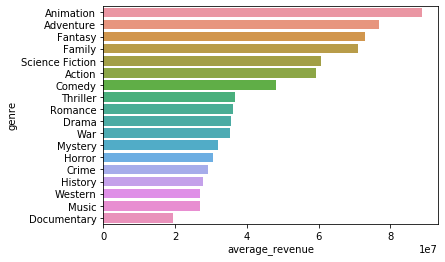

In [23]:
import seaborn as sns
sns.barplot(x="average_revenue", y="genre", data=average_revenue_by_genre.sort_values(['average_revenue'],ascending=False))

Genre indeed affects the revenues. While adventure and action movies have high revenues, documentaries and history movies have lower revenue. What other exploratory analysis can you think of using this dataset?


**Fin!** That's the end of this problem. Don't forget to restart and run this notebook from the beginning to verify that it works top-to-bottom before submitting. You can move on to the next problem